In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("Analytics_loan_collection_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           2000 non-null   object 
 1   Age                  2000 non-null   int64  
 2   Income               2000 non-null   int64  
 3   Location             2000 non-null   object 
 4   EmploymentStatus     2000 non-null   object 
 5   LoanAmount           2000 non-null   int64  
 6   TenureMonths         2000 non-null   int64  
 7   InterestRate         2000 non-null   float64
 8   LoanType             2000 non-null   object 
 9   MissedPayments       2000 non-null   int64  
 10  DelaysDays           2000 non-null   int64  
 11  PartialPayments      2000 non-null   int64  
 12  InteractionAttempts  2000 non-null   int64  
 13  SentimentScore       2000 non-null   float64
 14  ResponseTimeHours    2000 non-null   float64
 15  AppUsageFrequency    2000 non-null   f

In [4]:
df.head()

,CustomerID,Age,Income,Location,EmploymentStatus,LoanAmount,TenureMonths,InterestRate,LoanType,MissedPayments,DelaysDays,PartialPayments,InteractionAttempts,SentimentScore,ResponseTimeHours,AppUsageFrequency,WebsiteVisits,Complaints,Target
0,CUST0001,59,1121522,Suburban,Self-Employed,985115,7,13.60,Business,3,151,2,2,-0.74,17.94,0.52,19,0,1
1,CUST0002,49,1784166,Urban,Student,717304,34,14.38,Education,2,47,1,2,-0.77,60.48,0.76,14,2,1
2,CUST0003,35,1053938,Rural,Student,889319,9,9.61,Personal,3,68,1,9,-0.90,27.38,0.33,32,0,1
3,CUST0004,63,1814021,Urban,Student,655730,6,9.20,Business,3,169,4,1,0.13,38.55,0.38,16,0,1
4,CUST0005,28,1827781,Suburban,Self-Employed,99847,24,12.87,Personal,2,118,2,0,-0.51,67.85,0.93,19,0,0


In [5]:
df.describe()

,Age,Income,LoanAmount,TenureMonths,InterestRate,MissedPayments,DelaysDays,PartialPayments,InteractionAttempts,SentimentScore,ResponseTimeHours,AppUsageFrequency,WebsiteVisits,Complaints,Target
count,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,42.512000,1.111403e+06,5.261852e+05,33.134500,10.568970,1.922000,87.359000,0.996000,4.452000,-0.002280,36.490660,0.499680,23.95200,0.492000,0.492000
std,12.620519,5.059452e+05,2.702780e+05,15.467871,2.484002,1.308729,51.914908,0.999241,2.896185,0.571433,20.690489,0.286628,14.42275,0.676879,0.500061
min,20.000000,1.689200e+05,4.627000e+04,5.000000,6.110000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.550000,0.000000,0.00000,0.000000,0.000000
25%,32.000000,6.832432e+05,2.952082e+05,20.000000,8.447500,1.000000,43.750000,0.000000,2.000000,-0.500000,18.590000,0.250000,11.00000,0.000000,0.000000
50%,43.000000,1.117181e+06,5.200100e+05,33.000000,10.435000,2.000000,86.000000,1.000000,4.000000,0.015000,36.750000,0.500000,23.50000,0.000000,0.000000
75%,53.000000,1.509750e+06,7.641245e+05,47.000000,12.752500,3.000000,133.000000,2.000000,7.000000,0.480000,54.455000,0.740000,36.00000,1.000000,1.000000
max,65.000000,2.009257e+06,1.015496e+06,61.000000,15.470000,8.000000,179.000000,6.000000,9.000000,1.000000,71.990000,1.000000,49.00000,4.000000,1.000000


In [6]:
#Univarite Analysis In power BI

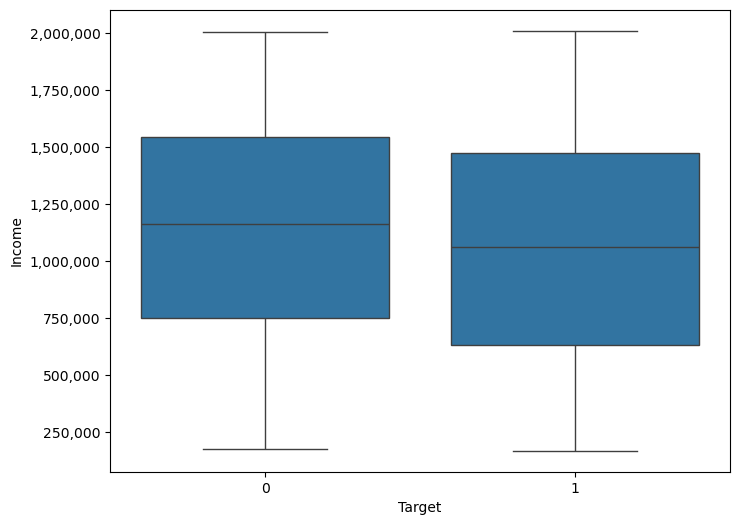

In [7]:
x_var = df["Target"]   # categorical column (e.g., 'Department', 'Gender')
y_var = df["Income"]    # numeric column (e.g., 'Salary', 'Age')

# Create box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=x_var, y=y_var, data=df)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

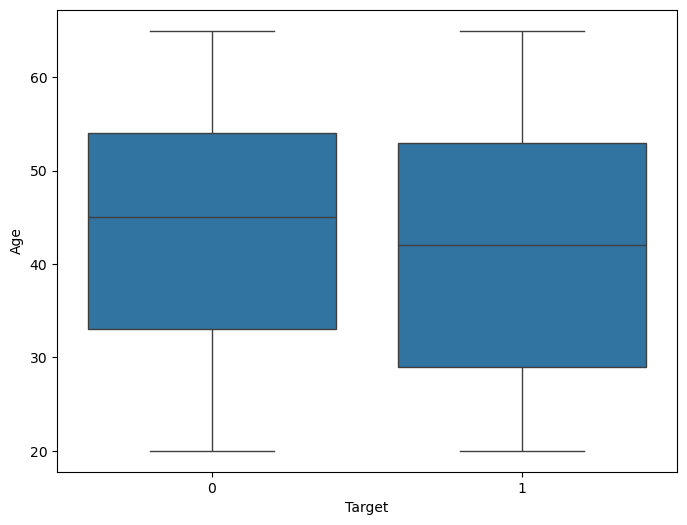

In [8]:
x_var = df["Target"]   # categorical column (e.g., 'Department', 'Gender')
y_var = df["Age"]    # numeric column (e.g., 'Salary', 'Age')

# Create box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=x_var, y=y_var, data=df)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

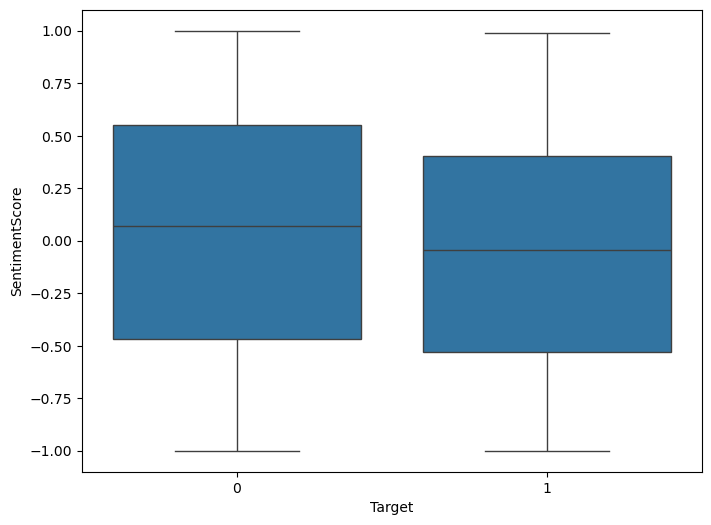

In [9]:
x_var = df["Target"]   # categorical column (e.g., 'Department', 'Gender')
y_var = df["SentimentScore"]    # numeric column (e.g., 'Salary', 'Age')

# Create box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=x_var, y=y_var, data=df)
plt.show()

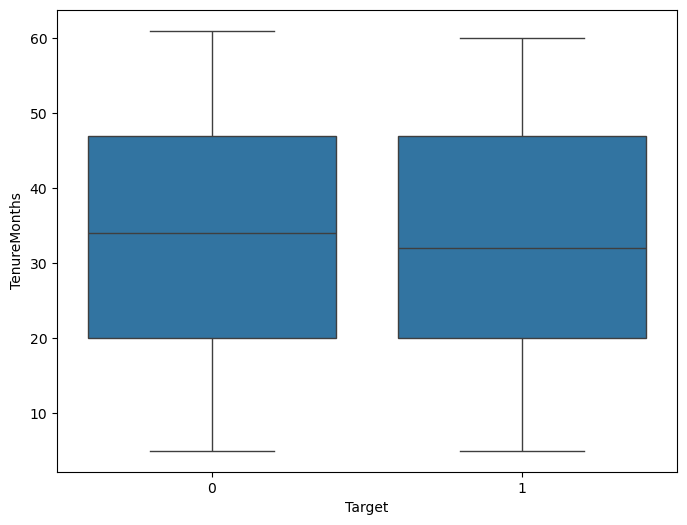

In [10]:
x_var = df["Target"]   # categorical column (e.g., 'Department', 'Gender')
y_var = df["TenureMonths"]    # numeric column (e.g., 'Salary', 'Age')

# Create box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=x_var, y=y_var, data=df)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

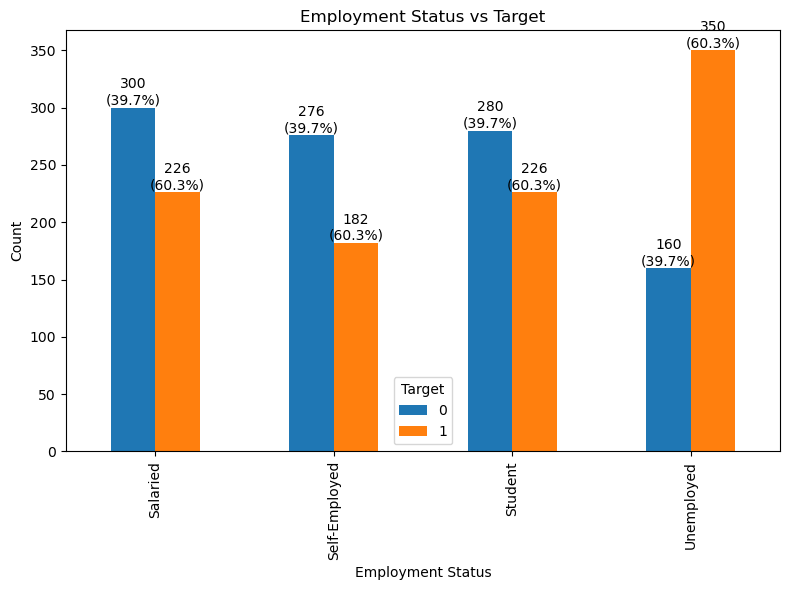

In [11]:
counts = df.groupby(['EmploymentStatus', 'Target']).size().unstack(fill_value=0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot grouped bars
ax = counts.plot(kind='bar', figsize=(8,6))

# Add labels (count + percentage)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # Get bar position in group
        idx = int(p.get_x() + p.get_width()/2)
        # Get row & column index
        col_index = int(p.get_x() // (p.get_width() * len(counts.columns)))
        row_index = int(p.get_x() % (p.get_width() * len(counts.columns)))
        # Get percentage
        status = counts.index[int(p.get_y() == 0)]
        target_val = counts.columns[int(p.get_x() // p.get_width()) % len(counts.columns)]
        percent_val = percentages.loc[status, target_val]
        ax.annotate(f'{int(height)}\n({percent_val:.1f}%)', 
                    (p.get_x() + p.get_width()/2, height), 
                    ha='center', va='bottom', fontsize=10)

plt.title('Employment Status vs Target')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

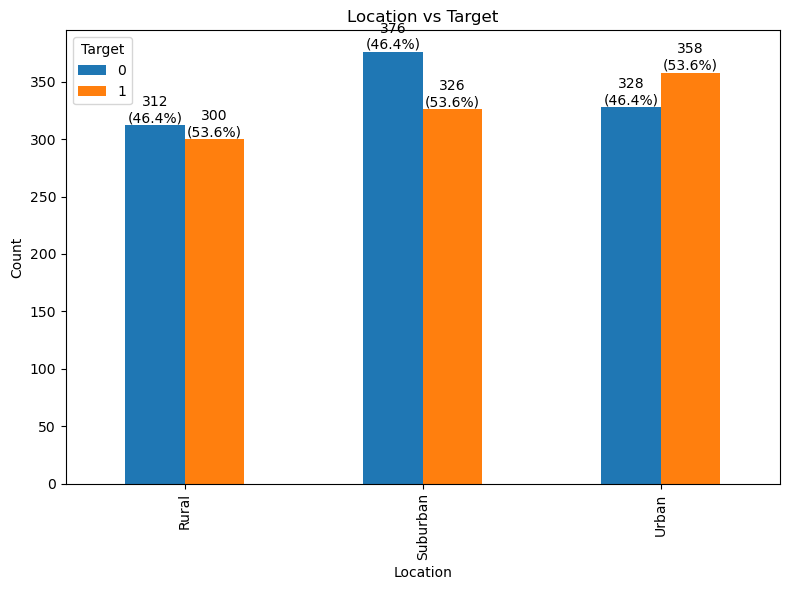

In [12]:
counts = df.groupby(['Location', 'Target']).size().unstack(fill_value=0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot grouped bars
ax = counts.plot(kind='bar', figsize=(8,6))

# Add labels (count + percentage)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # Get bar position in group
        idx = int(p.get_x() + p.get_width()/2)
        # Get row & column index
        col_index = int(p.get_x() // (p.get_width() * len(counts.columns)))
        row_index = int(p.get_x() % (p.get_width() * len(counts.columns)))
        # Get percentage
        status = counts.index[int(p.get_y() == 0)]
        target_val = counts.columns[int(p.get_x() // p.get_width()) % len(counts.columns)]
        percent_val = percentages.loc[status, target_val]
        ax.annotate(f'{int(height)}\n({percent_val:.1f}%)', 
                    (p.get_x() + p.get_width()/2, height), 
                    ha='center', va='bottom', fontsize=10)

plt.title('Location vs Target')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

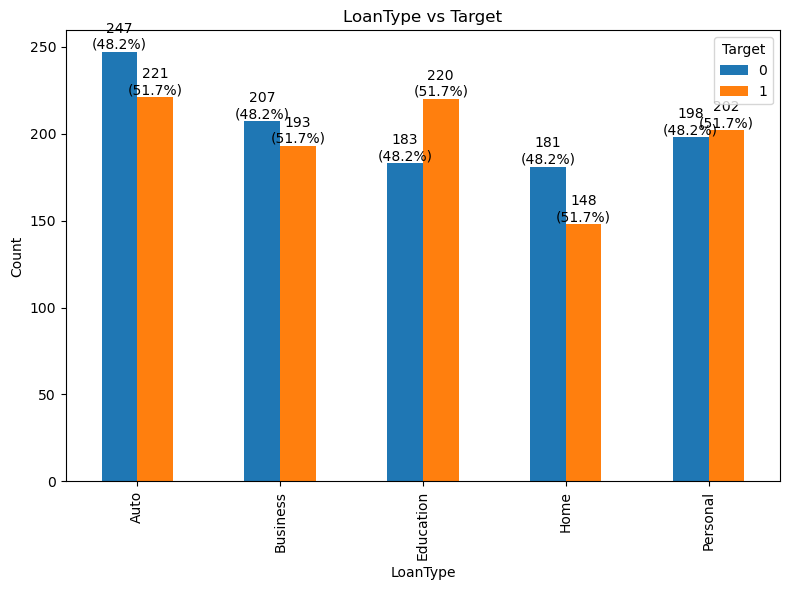

In [13]:
counts = df.groupby(['LoanType', 'Target']).size().unstack(fill_value=0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot grouped bars
ax = counts.plot(kind='bar', figsize=(8,6))

# Add labels (count + percentage)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        # Get bar position in group
        idx = int(p.get_x() + p.get_width()/2)
        # Get row & column index
        col_index = int(p.get_x() // (p.get_width() * len(counts.columns)))
        row_index = int(p.get_x() % (p.get_width() * len(counts.columns)))
        # Get percentage
        status = counts.index[int(p.get_y() == 0)]
        target_val = counts.columns[int(p.get_x() // p.get_width()) % len(counts.columns)]
        percent_val = percentages.loc[status, target_val]
        ax.annotate(f'{int(height)}\n({percent_val:.1f}%)', 
                    (p.get_x() + p.get_width()/2, height), 
                    ha='center', va='bottom', fontsize=10)

plt.title('LoanType vs Target')
plt.xlabel('LoanType')
plt.ylabel('Count')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

In [14]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()

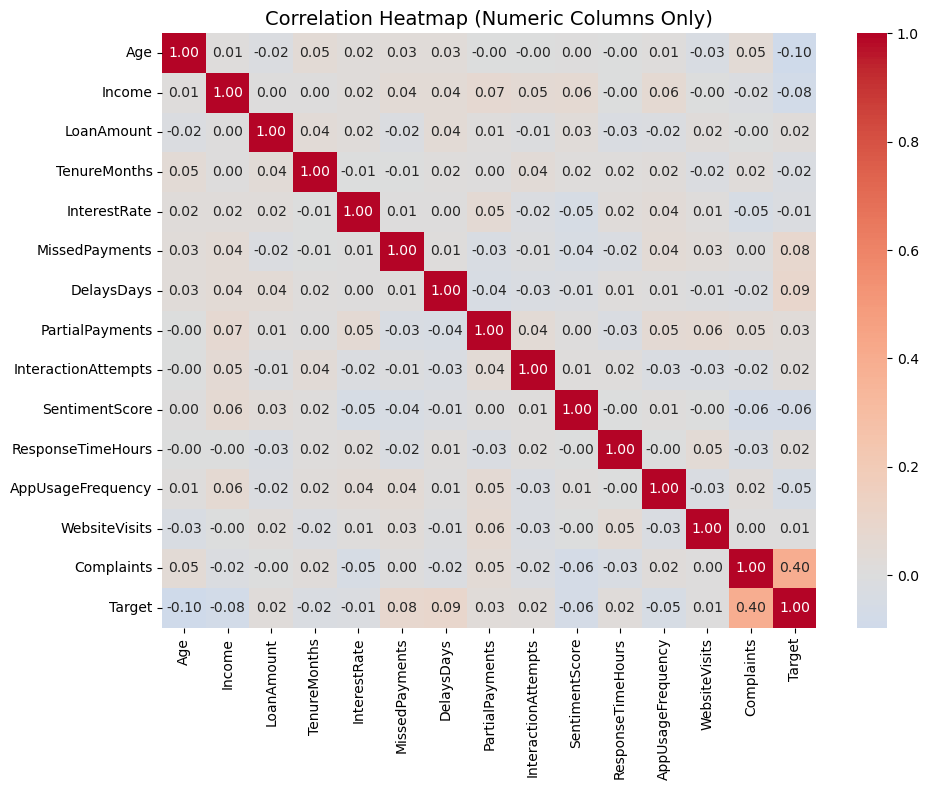

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Columns Only)", fontsize=14)
plt.tight_layout()
plt.show()

In [16]:
df['Debt_to_Income_Ratio'] = df['LoanAmount'] / df['Income']

In [17]:
df['Repayment_Score']=df['MissedPayments']*3+1*df['PartialPayments']+0.2*df['DelaysDays']

In [18]:
df['Interaction Effectiveness'] = np.where(df['InteractionAttempts'] == 0, 0, df['SentimentScore'] / df['InteractionAttempts'])

In [19]:
df.head()

,CustomerID,Age,Income,Location,EmploymentStatus,LoanAmount,TenureMonths,InterestRate,LoanType,MissedPayments,...,InteractionAttempts,SentimentScore,ResponseTimeHours,AppUsageFrequency,WebsiteVisits,Complaints,Target,Debt_to_Income_Ratio,Repayment_Score,Interaction Effectiveness
0,CUST0001,59,1121522,Suburban,Self-Employed,985115,7,13.60,Business,3,...,2,-0.74,17.94,0.52,19,0,1,0.878373,41.2,-0.370
1,CUST0002,49,1784166,Urban,Student,717304,34,14.38,Education,2,...,2,-0.77,60.48,0.76,14,2,1,0.402039,16.4,-0.385
2,CUST0003,35,1053938,Rural,Student,889319,9,9.61,Personal,3,...,9,-0.90,27.38,0.33,32,0,1,0.843806,23.6,-0.100
3,CUST0004,63,1814021,Urban,Student,655730,6,9.20,Business,3,...,1,0.13,38.55,0.38,16,0,1,0.361479,46.8,0.130
4,CUST0005,28,1827781,Suburban,Self-Employed,99847,24,12.87,Personal,2,...,0,-0.51,67.85,0.93,19,0,0,0.054627,31.6,0.000


In [20]:
print(df.columns.tolist())

['CustomerID', 'Age', 'Income', 'Location', 'EmploymentStatus', 'LoanAmount', 'TenureMonths', 'InterestRate', 'LoanType', 'MissedPayments', 'DelaysDays', 'PartialPayments', 'InteractionAttempts', 'SentimentScore', 'ResponseTimeHours', 'AppUsageFrequency', 'WebsiteVisits', 'Complaints', 'Target', 'Debt_to_Income_Ratio', 'Repayment_Score', 'Interaction Effectiveness']


In [21]:
df = df.drop(columns=['CustomerID'])

In [22]:
df.head()

,Age,Income,Location,EmploymentStatus,LoanAmount,TenureMonths,InterestRate,LoanType,MissedPayments,DelaysDays,...,InteractionAttempts,SentimentScore,ResponseTimeHours,AppUsageFrequency,WebsiteVisits,Complaints,Target,Debt_to_Income_Ratio,Repayment_Score,Interaction Effectiveness
0,59,1121522,Suburban,Self-Employed,985115,7,13.60,Business,3,151,...,2,-0.74,17.94,0.52,19,0,1,0.878373,41.2,-0.370
1,49,1784166,Urban,Student,717304,34,14.38,Education,2,47,...,2,-0.77,60.48,0.76,14,2,1,0.402039,16.4,-0.385
2,35,1053938,Rural,Student,889319,9,9.61,Personal,3,68,...,9,-0.90,27.38,0.33,32,0,1,0.843806,23.6,-0.100
3,63,1814021,Urban,Student,655730,6,9.20,Business,3,169,...,1,0.13,38.55,0.38,16,0,1,0.361479,46.8,0.130
4,28,1827781,Suburban,Self-Employed,99847,24,12.87,Personal,2,118,...,0,-0.51,67.85,0.93,19,0,0,0.054627,31.6,0.000


In [23]:
categorical_columns = ['Location', 'EmploymentStatus', 'LoanType']
df_dum = pd.get_dummies(df, columns=categorical_columns, drop_first=False).astype(int)
print(df_dum.head())

   Age   Income  LoanAmount  TenureMonths  InterestRate  MissedPayments  \
0   59  1121522      985115             7            13               3   
1   49  1784166      717304            34            14               2   
2   35  1053938      889319             9             9               3   
3   63  1814021      655730             6             9               3   
4   28  1827781       99847            24            12               2   

   DelaysDays  PartialPayments  InteractionAttempts  SentimentScore  ...  \
0         151                2                    2               0  ...   
1          47                1                    2               0  ...   
2          68                1                    9               0  ...   
3         169                4                    1               0  ...   
4         118                2                    0               0  ...   

   Location_Urban  EmploymentStatus_Salaried  EmploymentStatus_Self-Employed  \
0           

In [24]:
train_df, test_df = train_test_split(df_dum, test_size=0.2, random_state=42)

# train_df contains 80% of the data, test_df contains 20%
print(train_df.shape)
print(test_df.shape)

(1600, 30)
(400, 30)


In [25]:
# Features and target split
X_train = train_df.drop('Target', axis=1)
y_train = train_df['Target']
X_test  = test_df.drop('Target', axis=1)
y_test  = test_df['Target']

# Ensure column consistency
X_test = X_test[X_train.columns]

In [26]:
# 1. Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Results:
Accuracy: 0.645
              precision    recall  f1-score   support

           0       0.63      0.71      0.67       199
           1       0.67      0.58      0.62       201

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.64       400
weighted avg       0.65      0.65      0.64       400



D:\Users\Vinee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# 2. Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.9275
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       199
           1       0.96      0.89      0.93       201

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [28]:
#The Random Forest model is far more likely to make a correct prediction overall.

In [29]:
#Precision:When the RF model says a customer will default, it's correct 96% of the time. This means the collections team will be highly efficient, contacting the right people and avoiding annoying customers who would have paid anyway.

In [30]:
#Recall:The RF model successfully finds 89% of all the customers who truly end up defaulting. This is vital for minimizing financial losses.

In [31]:
#This score confirms the outstanding balance of Precision and Recall for the Random Forest model.

In [32]:
# Model interpretability

In [33]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


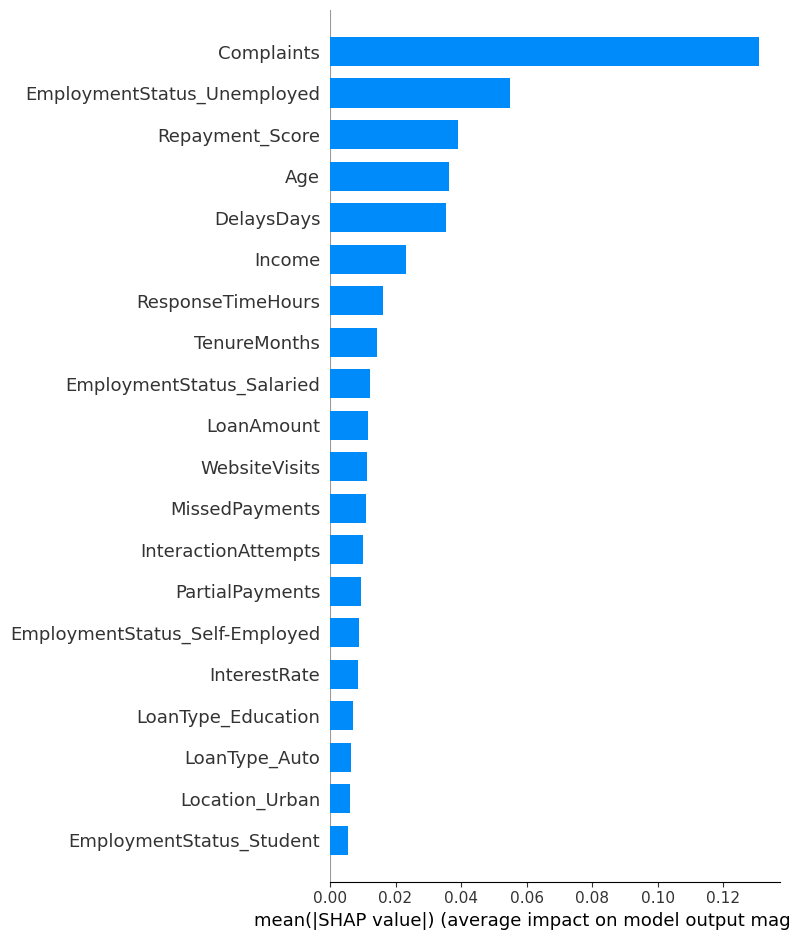

In [34]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Check the type and shape to decide how to plot
if isinstance(shap_values, list) and len(shap_values) == 2:
    # Typical binary classification: use shap_values[1]
    shap.summary_plot(shap_values[1], X_test, plot_type="bar")
elif isinstance(shap_values, list):
    # Multiclass: pick the class of interest
    shap.summary_plot(shap_values[1], X_test, plot_type="bar")
elif len(shap_values.shape) == 3:
    # 3D array: use class 1 along last axis
    shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")
else:
    # Just in case
    shap.summary_plot(shap_values, X_test, plot_type="bar")


In [35]:
#.predict_proba  (will work as input for the next model)

In [36]:
df.head()

,Age,Income,Location,EmploymentStatus,LoanAmount,TenureMonths,InterestRate,LoanType,MissedPayments,DelaysDays,...,InteractionAttempts,SentimentScore,ResponseTimeHours,AppUsageFrequency,WebsiteVisits,Complaints,Target,Debt_to_Income_Ratio,Repayment_Score,Interaction Effectiveness
0,59,1121522,Suburban,Self-Employed,985115,7,13.60,Business,3,151,...,2,-0.74,17.94,0.52,19,0,1,0.878373,41.2,-0.370
1,49,1784166,Urban,Student,717304,34,14.38,Education,2,47,...,2,-0.77,60.48,0.76,14,2,1,0.402039,16.4,-0.385
2,35,1053938,Rural,Student,889319,9,9.61,Personal,3,68,...,9,-0.90,27.38,0.33,32,0,1,0.843806,23.6,-0.100
3,63,1814021,Urban,Student,655730,6,9.20,Business,3,169,...,1,0.13,38.55,0.38,16,0,1,0.361479,46.8,0.130
4,28,1827781,Suburban,Self-Employed,99847,24,12.87,Personal,2,118,...,0,-0.51,67.85,0.93,19,0,0,0.054627,31.6,0.000


In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# --- 3. Preprocessing ---
# Define features (X) and target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Identify categorical and numerical features
categorical_features = ['Location', 'EmploymentStatus']
numerical_features = ['Age', 'Income', 'LoanAmount', 'MissedPayments', 'Complaints','Debt_to_Income_Ratio', 'Repayment_Score','ResponseTimeHours']

# Create a preprocessing pipeline
# This pipeline will:
# 1. One-hot encode the categorical features.
# 2. Scale the numerical features (important for SVM and Neural Networks).
preprocessor = ColumnTransformer(
    transformers=[ # <-- CORRECTED THIS LINE
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Setup Complete: Data is loaded, engineered, and split for training.")


Setup Complete: Data is loaded, engineered, and split for training.


In [38]:
!pip install xgboost

In [39]:
# Import the necessary libraries for the model and evaluation
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# --- Prerequisite ---
# This code assumes you have already run the setup script and have the following
# variables loaded in your environment:
# - X_train, y_train: Your training data and labels
# - X_test, y_test: Your testing data and labels
# - preprocessor: The ColumnTransformer object for preprocessing

# --- 1. Create the XGBoost Model Pipeline ---
# A pipeline is a clean way to chain together preprocessing and model training.
# It ensures that the same transformations are applied to both your training
# and testing data, preventing data leakage.
print("--- Creating and Training Gradient Boosting (XGBoost) Model ---")

xgb_pipeline = Pipeline(steps=[
    # Step 1: Apply the preprocessing (scaling numerical features, one-hot encoding categorical ones)
    ('preprocessor', preprocessor),
    
    # Step 2: Train the XGBoost Classifier
    # 'use_label_encoder=False' and 'eval_metric='logloss'' are set to handle modern XGBoost versions.
    # 'random_state=42' ensures that the results are reproducible.
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])


# --- 2. Train the Model ---
# The .fit() method trains the entire pipeline. It first transforms the X_train data
# using the preprocessor and then feeds the result into the XGBoost classifier.
xgb_pipeline.fit(X_train, y_train)
print("Model training complete.")


# --- 3. Make Predictions ---
# The .predict() method makes predictions on the test set. It automatically
# applies the same preprocessing steps that were learned from the training data.
y_pred_xgb = xgb_pipeline.predict(X_test)
print("Predictions made on the test set.")


# --- 4. Evaluate the Model ---
# The classification_report provides a comprehensive breakdown of the model's performance,
# including precision, recall, and f1-score for each class (0 and 1), as well as the overall accuracy.
print("\n--- XGBoost Model Evaluation Report ---")
print(classification_report(y_test, y_pred_xgb))
print("-" * 50)


--- Creating and Training Gradient Boosting (XGBoost) Model ---
Model training complete.
Predictions made on the test set.

--- XGBoost Model Evaluation Report ---
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       203
           1       0.91      0.90      0.91       197

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

--------------------------------------------------


D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [40]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# NOTE: This code assumes you have already run the setup from Part 1.
# The variables 'preprocessor', 'X_train', 'y_train', 'X_test', 'y_test' must exist.

# --- Model 2: Support Vector Machine (SVM) ---
print("--- Training Support Vector Machine (SVM) Model ---")

# Create a pipeline for the SVM model
# We use probability=True to get probability scores if needed, which can make it slower.
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(kernel='rbf', probability=True, random_state=42))])

# Train the model
svm_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_pipeline.predict(X_test)

# Print the evaluation report
print("SVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))
print("-" * 50 + "\n")

--- Training Support Vector Machine (SVM) Model ---
SVM Model Evaluation:
              precision    recall  f1-score   support

           0       0.73      0.80      0.77       203
           1       0.77      0.70      0.73       197

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400

--------------------------------------------------



In [41]:
# Import the Neural Network library
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# NOTE: This code assumes you have already run the setup from Part 1
# AND the model training from Parts 2 and 3.
# The variables 'preprocessor', 'X_train', 'y_train', 'X_test', 'y_test',
# 'y_pred_xgb', and 'y_pred_svm' must exist.

# --- Model 3: Neural Network (MLP) ---
print("--- Training Neural Network (MLP) Model ---")

# Create a pipeline for the Neural Network
# A simple neural network with two hidden layers.
# max_iter is increased to ensure the model converges.
nn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42))])

# Train the model
nn_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_pipeline.predict(X_test)

# Print the evaluation report
print("Neural Network Model Evaluation:")
print(classification_report(y_test, y_pred_nn))
print("-" * 50 + "\n")


# --- 5. Summary Report ---
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

# Create a summary DataFrame
summary_df = pd.DataFrame([
    get_metrics(y_test, y_pred_xgb, "XGBoost"),
    get_metrics(y_test, y_pred_svm, "SVM"),
    get_metrics(y_test, y_pred_nn, "Neural Network")
])

print("--- Model Comparison Summary ---")
print(summary_df.to_string(index=False))


--- Training Neural Network (MLP) Model ---
Neural Network Model Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       203
           1       0.91      0.91      0.91       197

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

--------------------------------------------------

--- Model Comparison Summary ---
         Model  Accuracy  Precision   Recall  F1-Score
       XGBoost    0.9075   0.908163 0.903553  0.905852
           SVM    0.7500   0.774011 0.695431  0.732620
Neural Network    0.9100   0.908629 0.908629  0.908629


In [42]:
# List of your employment status dummy columns
employment_dummy_columns = [
    'EmploymentStatus_Salaried', 
    'EmploymentStatus_Self-Employed', 
    'EmploymentStatus_Unemployed', 
    'EmploymentStatus_Student'
]

# Calculate and print the counts by summing up the 1s in each dummy column
category_counts = df_dum[employment_dummy_columns].sum()

print("Number of rows for each employment status:")
print(category_counts)

Number of rows for each employment status:
EmploymentStatus_Salaried         526
EmploymentStatus_Self-Employed    458
EmploymentStatus_Unemployed       510
EmploymentStatus_Student          506
dtype: int64


In [43]:
# --- 3. Segmented Model Training for All Models ---
# --- IMPORTANT: VERIFY YOUR COLUMN NAMES HERE ---
original_statuses = ['Salaried', 'Self-Employed', 'Unemployed', 'Student']
employment_dummy_columns = [f"EmploymentStatus_{s}" for s in original_statuses]
location_dummy_columns = ['Location_Urban', 'Location_Suburban', 'Location_Rural']

# Store results for all models
results = []

# Loop through each original employment status
for status in original_statuses:
    dummy_col_name = f"EmploymentStatus_{status}"
    
    if dummy_col_name not in df_dum.columns:
        print(f"--- WARNING: Column '{dummy_col_name}' not found. Skipping segment: {status} ---\n")
        continue

    print(f"--- Processing Segment: {status} ---")
    
    df_segment = df_dum[df_dum[dummy_col_name] == 1].copy()
    
    if len(df_segment) < 20 or df_segment['Target'].nunique() < 2:
        print(f"Skipping '{status}' due to insufficient data or only one class present.\n")
        continue
        
    X_segment = df_segment.drop(['Target'] + employment_dummy_columns, axis=1, errors='ignore')
    y_segment = df_segment['Target']

    numerical_features = X_segment.columns.tolist()

    preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)])

    X_train, X_test, y_train, y_test = train_test_split(X_segment, y_segment, test_size=0.20, random_state=42, stratify=y_segment)

    # --- Define all models to be tested ---
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "SVM": SVC(random_state=42),
        "Neural Network": MLPClassifier(random_state=42, max_iter=500)
    }

    # Train and evaluate each model for the current segment
    for model_name, model in models.items():
        print(f"  Training {model_name}...")
        
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', model)])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Append result
        results.append({
            'Employment Status': status,
            'Model': model_name,
            'Accuracy': accuracy
        })
        print(f"  Accuracy for {model_name}: {accuracy:.4f}")
    
    print("-" * 30)


# --- 4. Final Summary ---
print("\n--- Overall Model Accuracy Comparison by Segment ---")
if results:
    summary_df = pd.DataFrame(results)
    # Pivot the table for better comparison
    pivot_summary = summary_df.pivot(index='Employment Status', columns='Model', values='Accuracy')
    print(pivot_summary)
else:
    print("No models were trained due to insufficient data in segments.")


--- Processing Segment: Salaried ---
  Training Logistic Regression...
  Accuracy for Logistic Regression: 0.6792
  Training Random Forest...
  Accuracy for Random Forest: 0.9434
  Training XGBoost...
  Accuracy for XGBoost: 0.9245
  Training SVM...
  Accuracy for SVM: 0.8396
  Training Neural Network...


D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Users\Vinee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


  Accuracy for Neural Network: 0.9623
------------------------------
--- Processing Segment: Self-Employed ---
  Training Logistic Regression...
  Accuracy for Logistic Regression: 0.6630
  Training Random Forest...
  Accuracy for Random Forest: 0.9130
  Training XGBoost...
  Accuracy for XGBoost: 0.8913
  Training SVM...
  Accuracy for SVM: 0.8043
  Training Neural Network...


D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Accuracy for Neural Network: 0.9348
------------------------------
--- Processing Segment: Unemployed ---
  Training Logistic Regression...
  Accuracy for Logistic Regression: 0.7745
  Training Random Forest...
  Accuracy for Random Forest: 0.9804
  Training XGBoost...
  Accuracy for XGBoost: 1.0000
  Training SVM...
  Accuracy for SVM: 0.8137
  Training Neural Network...


D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\Users\Vinee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


  Accuracy for Neural Network: 0.9510
------------------------------
--- Processing Segment: Student ---
  Training Logistic Regression...
  Accuracy for Logistic Regression: 0.6863
  Training Random Forest...
  Accuracy for Random Forest: 0.9412
  Training XGBoost...
  Accuracy for XGBoost: 0.8529
  Training SVM...
  Accuracy for SVM: 0.7843
  Training Neural Network...


D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Accuracy for Neural Network: 0.9020
------------------------------

--- Overall Model Accuracy Comparison by Segment ---
Model              Logistic Regression  Neural Network  Random Forest  \
Employment Status                                                       
Salaried                      0.679245        0.962264       0.943396   
Self-Employed                 0.663043        0.934783       0.913043   
Student                       0.686275        0.901961       0.941176   
Unemployed                    0.774510        0.950980       0.980392   

Model                   SVM   XGBoost  
Employment Status                      
Salaried           0.839623  0.924528  
Self-Employed      0.804348  0.891304  
Student            0.784314  0.852941  
Unemployed         0.813725  1.000000  


D:\Users\Vinee\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
#Perfect Model for Each Category
#Student- Random Forest-94%
#Salaried- Neural Network-96%
#Self-Employed- Neural Network-93%
#Unemployed- XGBoost-100%

In [45]:
 #--- 3. Segmented Model Training for All Models ---
# --- CHANGE THIS SECTION FOR LOCATION ANALYSIS ---
original_statuses = ['Urban', 'Suburban', 'Rural']
segment_prefix = "Location" # The prefix for your dummy columns
# --------------------------------------------------

employment_dummy_columns = ['EmploymentStatus_Salaried', 'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed', 'EmploymentStatus_Student']
location_dummy_columns = [f"{segment_prefix}_{s}" for s in original_statuses]

# Store results for all models
results = []

# Loop through each original location status
for status in original_statuses:
    dummy_col_name = f"{segment_prefix}_{status}"
    
    if dummy_col_name not in df_dum.columns:
        print(f"--- WARNING: Column '{dummy_col_name}' not found. Skipping segment: {status} ---\n")
        continue

    print(f"--- Processing Segment: {status} ---")
    
    df_segment = df_dum[df_dum[dummy_col_name] == 1].copy()
    
    if len(df_segment) < 20 or df_segment['Target'].nunique() < 2:
        print(f"Skipping '{status}' due to insufficient data or only one class present.\n")
        continue
        
    X_segment = df_segment.drop(['Target'] + location_dummy_columns, axis=1, errors='ignore')
    y_segment = df_segment['Target']

    numerical_features = X_segment.columns.tolist()

    preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)])

    X_train, X_test, y_train, y_test = train_test_split(X_segment, y_segment, test_size=0.25, random_state=42, stratify=y_segment)

    # --- Define all models to be tested ---
    models = {
        "Logistic Regression": LogisticRegression(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "SVM": SVC(random_state=42),
        "Neural Network": MLPClassifier(random_state=42, max_iter=500)
    }

    # Train and evaluate each model for the current segment
    for model_name, model in models.items():
        print(f"  Training {model_name}...")
        
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', model)])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Append result
        results.append({
            'Location': status,
            'Model': model_name,
            'Accuracy': accuracy
        })
        print(f"  Accuracy for {model_name}: {accuracy:.4f}")
    
    print("-" * 30)


# --- 4. Final Summary ---
print("\n--- Overall Model Accuracy Comparison by Segment ---")
if results:
    summary_df = pd.DataFrame(results)
    # Pivot the table for better comparison
    pivot_summary = summary_df.pivot(index='Location', columns='Model', values='Accuracy')
    print(pivot_summary)
else:
    print("No models were trained due to insufficient data in segments.")


--- Processing Segment: Urban ---
  Training Logistic Regression...
  Accuracy for Logistic Regression: 0.7791
  Training Random Forest...
  Accuracy for Random Forest: 0.9070
  Training XGBoost...
  Accuracy for XGBoost: 0.8837
  Training SVM...
  Accuracy for SVM: 0.8372
  Training Neural Network...


D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Accuracy for Neural Network: 0.9070
------------------------------
--- Processing Segment: Suburban ---
  Training Logistic Regression...
  Accuracy for Logistic Regression: 0.7159
  Training Random Forest...
  Accuracy for Random Forest: 0.8864
  Training XGBoost...
  Accuracy for XGBoost: 0.9034
  Training SVM...
  Accuracy for SVM: 0.7443
  Training Neural Network...


D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Accuracy for Neural Network: 0.8750
------------------------------
--- Processing Segment: Rural ---
  Training Logistic Regression...
  Accuracy for Logistic Regression: 0.6144
  Training Random Forest...
  Accuracy for Random Forest: 0.9477
  Training XGBoost...
  Accuracy for XGBoost: 0.9346
  Training SVM...
  Accuracy for SVM: 0.8039
  Training Neural Network...


D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Accuracy for Neural Network: 0.9085
------------------------------

--- Overall Model Accuracy Comparison by Segment ---
Model     Logistic Regression  Neural Network  Random Forest       SVM  \
Location                                                                 
Rural                0.614379        0.908497       0.947712  0.803922   
Suburban             0.715909        0.875000       0.886364  0.744318   
Urban                0.779070        0.906977       0.906977  0.837209   

Model      XGBoost  
Location            
Rural     0.934641  
Suburban  0.903409  
Urban     0.883721  


In [46]:
#Classification based on employment status is doing better then based on location

In [47]:
# --- 3. Split Data into a Single Train and Test Set ---
X = df_dum.drop('Target', axis=1)
y = df_dum['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"Data split into {len(X_train)} training records and {len(X_test)} testing records.")
print("-" * 50 + "\n")


# --- 4. Define and Train the "Expert" Models ---
# --- Using your specified best model for each category ---
expert_models_config = {
    'Student': RandomForestClassifier(random_state=42),
    'Salaried': MLPClassifier(random_state=42, max_iter=500),
    'Self-Employed': MLPClassifier(random_state=42, max_iter=500),
    'Unemployed': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

trained_experts = {}
employment_dummy_columns = ['EmploymentStatus_Salaried', 'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed', 'EmploymentStatus_Student']

# Train each expert model only on its segment of the TRAINING data
for status, model in expert_models_config.items():
    dummy_col_name = f"EmploymentStatus_{status}"
    print(f"--- Training expert for: {status} ---")
    
    # Filter the TRAINING data for this segment
    train_segment_mask = X_train[dummy_col_name] == 1
    X_train_segment = X_train[train_segment_mask]
    y_train_segment = y_train[train_segment_mask]

    if len(X_train_segment) == 0:
        print(f"Skipping {status}, no training data available.")
        continue

    # Define features for the model (drop ONLY employment dummy columns)
    features_to_use = X_train_segment.drop(employment_dummy_columns, axis=1, errors='ignore')
    
    # Identify numerical features from the remaining columns
    numerical_features = features_to_use.select_dtypes(include=np.number).columns.tolist()

    # Create a simple pipeline for this expert
    preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)], remainder='passthrough')
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    # Train the expert
    pipeline.fit(features_to_use, y_train_segment)
    
    # Store the trained pipeline
    trained_experts[status] = pipeline
    print(f"Expert for '{status}' trained successfully.")


# --- 5. Make Predictions using the Mixture of Experts ---
print("\n--- Making predictions on the test set using the expert models ---")
all_predictions = []

# Loop through the test set by segment
for status in expert_models_config.keys():
    dummy_col_name = f"EmploymentStatus_{status}"
    
    # Filter the TEST data for this segment
    test_segment_mask = X_test[dummy_col_name] == 1
    X_test_segment = X_test[test_segment_mask]

    if len(X_test_segment) == 0:
        continue # No one to predict for in this segment

    # Get the correct trained expert
    expert_pipeline = trained_experts.get(status)
    if not expert_pipeline:
        print(f"Warning: No trained expert for {status}, cannot make predictions.")
        continue

    # Prepare features for prediction (drop ONLY employment dummy columns)
    features_to_predict = X_test_segment.drop(employment_dummy_columns, axis=1, errors='ignore')
    
    # Make predictions and store them
    segment_predictions = expert_pipeline.predict(features_to_predict)
    
    # Create a temporary series to hold predictions with original index
    predictions_series = pd.Series(segment_predictions, index=X_test_segment.index)
    all_predictions.append(predictions_series)

# Combine all predictions and align them with the original y_test index
if all_predictions:
    final_predictions_series = pd.concat(all_predictions).sort_index()
    y_pred_final = final_predictions_series.reindex(y_test.index).fillna(0) # Fill any missing with a default prediction
else:
    y_pred_final = pd.Series(0, index=y_test.index) # Default if no predictions were made


# --- 6. Calculate Overall Performance ---
print("\n--- Overall Performance of the 'Mixture of Experts' Model ---")
print(classification_report(y_test, y_pred_final))


Data split into 1600 training records and 400 testing records.
--------------------------------------------------

--- Training expert for: Student ---
Expert for 'Student' trained successfully.
--- Training expert for: Salaried ---
Expert for 'Salaried' trained successfully.
--- Training expert for: Self-Employed ---
Expert for 'Self-Employed' trained successfully.
--- Training expert for: Unemployed ---
Expert for 'Unemployed' trained successfully.

--- Making predictions on the test set using the expert models ---

--- Overall Performance of the 'Mixture of Experts' Model ---
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       203
           1       0.95      0.92      0.93       197

    accuracy                           0.94       400
   macro avg       0.94      0.93      0.93       400
weighted avg       0.94      0.94      0.93       400



D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [48]:
# --- 3. Split Data into a Single Train and Test Set ---
X = df_dum.drop('Target', axis=1)
y = df_dum['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"Data split into {len(X_train)} training records and {len(X_test)} testing records.")
print("-" * 50 + "\n")


# --- 4. Define and Train the "Expert" Models ---
# --- Using your specified best model for each category ---
expert_models_config = {
    'Student': RandomForestClassifier(random_state=42),
    'Salaried': MLPClassifier(random_state=42, max_iter=500),
    'Self-Employed': MLPClassifier(random_state=42, max_iter=500),
    'Unemployed': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

trained_experts = {}
employment_dummy_columns = ['EmploymentStatus_Salaried', 'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed', 'EmploymentStatus_Student']

# Train each expert model only on its segment of the TRAINING data
for status, model in expert_models_config.items():
    dummy_col_name = f"EmploymentStatus_{status}"
    print(f"--- Training expert for: {status} ---")
    
    # Filter the TRAINING data for this segment
    train_segment_mask = X_train[dummy_col_name] == 1
    X_train_segment = X_train[train_segment_mask]
    y_train_segment = y_train[train_segment_mask]

    if len(X_train_segment) == 0:
        print(f"Skipping {status}, no training data available.")
        continue

    # Define features for the model (drop ONLY employment dummy columns)
    features_to_use = X_train_segment.drop(employment_dummy_columns, axis=1, errors='ignore')
    
    # Identify numerical features from the remaining columns
    numerical_features = features_to_use.select_dtypes(include=np.number).columns.tolist()

    # Create a simple pipeline for this expert
    preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)], remainder='passthrough')
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    # Train the expert
    pipeline.fit(features_to_use, y_train_segment)
    
    # Store the trained pipeline
    trained_experts[status] = pipeline
    print(f"Expert for '{status}' trained successfully.")


# --- 5. Make Predictions and Calculate Individual Accuracies ---
print("\n--- Making predictions on the test set using the expert models ---")
all_predictions = []
individual_accuracies = {}

# Loop through the test set by segment
for status in expert_models_config.keys():
    dummy_col_name = f"EmploymentStatus_{status}"
    
    # Filter the TEST data for this segment
    test_segment_mask = X_test[dummy_col_name] == 1
    X_test_segment = X_test[test_segment_mask]
    y_test_segment = y_test[test_segment_mask] # Get true labels for this segment

    if len(X_test_segment) == 0:
        continue # No one to predict for in this segment

    # Get the correct trained expert
    expert_pipeline = trained_experts.get(status)
    if not expert_pipeline:
        print(f"Warning: No trained expert for {status}, cannot make predictions.")
        continue

    # Prepare features for prediction (drop ONLY employment dummy columns)
    features_to_predict = X_test_segment.drop(employment_dummy_columns, axis=1, errors='ignore')
    
    # Make predictions for the segment
    segment_predictions = expert_pipeline.predict(features_to_predict)
    
    # --- ADDED: Calculate and store individual accuracy ---
    accuracy = accuracy_score(y_test_segment, segment_predictions)
    individual_accuracies[status] = accuracy
    
    # Create a temporary series to hold predictions with original index
    predictions_series = pd.Series(segment_predictions, index=X_test_segment.index)
    all_predictions.append(predictions_series)

# --- 5a. Display Individual Expert Performance ---
print("\n--- Individual Accuracy of Each Expert on its Test Segment ---")
if individual_accuracies:
    for status, acc in individual_accuracies.items():
        print(f"  Accuracy for {status}: {acc:.4f}")
else:
    print("No individual accuracies to report.")


# --- 6. Combine Predictions and Calculate Overall Performance ---
# Combine all predictions and align them with the original y_test index
if all_predictions:
    final_predictions_series = pd.concat(all_predictions).sort_index()
    y_pred_final = final_predictions_series.reindex(y_test.index).fillna(0) # Fill any missing with a default prediction
else:
    y_pred_final = pd.Series(0, index=y_test.index) # Default if no predictions were made


print("\n--- Overall Performance of the 'Mixture of Experts' Model ---")
print(classification_report(y_test, y_pred_final))


Data split into 1600 training records and 400 testing records.
--------------------------------------------------

--- Training expert for: Student ---
Expert for 'Student' trained successfully.
--- Training expert for: Salaried ---
Expert for 'Salaried' trained successfully.
--- Training expert for: Self-Employed ---
Expert for 'Self-Employed' trained successfully.
--- Training expert for: Unemployed ---
Expert for 'Unemployed' trained successfully.

--- Making predictions on the test set using the expert models ---

--- Individual Accuracy of Each Expert on its Test Segment ---
  Accuracy for Student: 0.8932
  Accuracy for Salaried: 0.9406
  Accuracy for Self-Employed: 0.9796
  Accuracy for Unemployed: 0.9286

--- Overall Performance of the 'Mixture of Experts' Model ---
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       203
           1       0.95      0.92      0.93       197

    accuracy                           0.94       40

D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [49]:
import pandas as pd
import numpy as np

# --- 1. Define Business Assumptions ---
TOTAL_CUSTOMERS = 2000
AVG_LOAN_AMOUNT = 526185
PROFIT_MARGIN = 0.01
# --- User-Provided Inputs ---
COST_PER_COLLECTION_ATTEMPT = 250
TRADITIONAL_RECOVERY_RATE = 0.40 # 40%
TRADITIONAL_MISSED_DEFAULTERS = 500
# --- Assumptions based on "use own" ---
TRADITIONAL_WASTED_CONTACTS = 510 
MODEL_RECOVERY_RATE = 0.60 # 60%

# --- Calculated Values ---
DEFAULT_RATE = 0.49
CUSTOMERS_WHO_DEFAULT = int(TOTAL_CUSTOMERS * DEFAULT_RATE)  # 985
CUSTOMERS_WHO_PAY = TOTAL_CUSTOMERS - CUSTOMERS_WHO_DEFAULT # 1015
TRADITIONAL_CONTACTED_DEFAULTERS = CUSTOMERS_WHO_DEFAULT - TRADITIONAL_MISSED_DEFAULTERS # 985 - 984 = 1


# --- 2. Scenario 1: Without a Model (Traditional Approach) ---
print("--- Calculating Scenario 1: Without a Model ---")

# Revenue from customers who pay and are NOT contacted
profit_from_good_customers = CUSTOMERS_WHO_PAY * (AVG_LOAN_AMOUNT * PROFIT_MARGIN)


# Cost of wasted contacts
cost_of_wasted_contacts = TRADITIONAL_WASTED_CONTACTS * COST_PER_COLLECTION_ATTEMPT

# Revenue from successfully recovered loans
revenue_from_recovered_loans = TRADITIONAL_CONTACTED_DEFAULTERS * AVG_LOAN_AMOUNT * TRADITIONAL_RECOVERY_RATE

# Cost of contacting the defaulters they found
cost_of_contacting_defaulters = TRADITIONAL_CONTACTED_DEFAULTERS * COST_PER_COLLECTION_ATTEMPT

# Loss from the defaulters they completely missed
loss_from_missed_defaulters = TRADITIONAL_MISSED_DEFAULTERS * AVG_LOAN_AMOUNT

# Net impact for the traditional approach
net_impact_without_model = (profit_from_good_customers + revenue_from_recovered_loans) - \
                           (cost_of_wasted_contacts + cost_of_contacting_defaulters + loss_from_missed_defaulters)


# --- 3. Scenario 2: With Your "Mixture of Experts" Model ---
print("--- Calculating Scenario 2: With Your Model ---")

# Your model's performance metrics
MODEL_RECALL = 0.92
MODEL_PRECISION = 0.95

# Calculate the confusion matrix based on your model's performance
TP = int(CUSTOMERS_WHO_DEFAULT * MODEL_RECALL) # True Positives (correctly identified defaulters) = 906
FN = CUSTOMERS_WHO_DEFAULT - TP              # False Negatives (missed defaulters) = 79
FP = int(TP / MODEL_PRECISION) - TP           # False Positives (wasted contacts) = 48
TN = CUSTOMERS_WHO_PAY - FP                   # True Negatives (correctly identified payers) = 967

# Revenue from customers who pay and are correctly identified (TN)
profit_from_tn = TN * (AVG_LOAN_AMOUNT * PROFIT_MARGIN)
# We also SAVE the cost of not contacting them
savings_from_tn = (TRADITIONAL_WASTED_CONTACTS - FP) * COST_PER_COLLECTION_ATTEMPT


# Revenue recovered from correctly identified defaulters (TP)
revenue_from_tp = TP * AVG_LOAN_AMOUNT * MODEL_RECOVERY_RATE
# Cost of contacting these defaulters
cost_of_tp_interventions = TP * COST_PER_COLLECTION_ATTEMPT
net_gain_from_tp = revenue_from_tp - cost_of_tp_interventions

# Cost of wasted efforts on people who would have paid anyway (FP)
cost_of_fp = FP * COST_PER_COLLECTION_ATTEMPT

# Loss from the defaulters the model missed (FN)
loss_from_fn = FN * AVG_LOAN_AMOUNT

# Net impact with your model
net_impact_with_model = (profit_from_tn + savings_from_tn + net_gain_from_tp) - (cost_of_fp + loss_from_fn)


# --- 4. Final Summary Report ---
total_value_added = net_impact_with_model - net_impact_without_model
value_per_customer = total_value_added / TOTAL_CUSTOMERS

print("\n\n--- Financial Impact Summary (Based on Your Inputs) ---")
print("="*60)
print(f"Scenario 1: Without Model Net Impact: ₹{net_impact_without_model:,.2f}")
print(f"Scenario 2: With Model Net Impact:   ₹{net_impact_with_model:,.2f}")
print("="*60)
print(f"Total Value Added by the Model:      ₹{total_value_added:,.2f}")
print(f"Average Gain Per Customer:           ₹{value_per_customer:,.2f}")
print("="*60)


--- Calculating Scenario 1: Without a Model ---
--- Calculating Scenario 2: With Your Model ---


--- Financial Impact Summary (Based on Your Inputs) ---
Scenario 1: Without Model Net Impact: ₹-156,945,393.00
Scenario 2: With Model Net Impact:   ₹247,885,526.05
Total Value Added by the Model:      ₹404,830,919.05
Average Gain Per Customer:           ₹202,415.46


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Import the models you used
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

# --- 1. Load and Prepare Data (Same as your code) ---
df = pd.read_csv("Analytics_loan_collection_dataset.csv")
df.drop('CustomerID', axis=1, inplace=True)
df_dum = pd.get_dummies(df, columns=['Location', 'LoanType', 'EmploymentStatus'], drop_first=False) # Keep all dummies for clarity

# --- 2. Split Data into a Single Train and Test Set (Same as your code) ---
X = df_dum.drop('Target', axis=1)
y = df_dum['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"Data split into {len(X_train)} training records and {len(X_test)} testing records.")
print("-" * 50 + "\n")


# --- 3. Define and Train the "Expert" Models (Same as your code) ---
expert_models_config = {
    'Student': RandomForestClassifier(random_state=42),
    'Salaried': MLPClassifier(random_state=42, max_iter=500),
    'Self-Employed': MLPClassifier(random_state=42, max_iter=500),
    'Unemployed': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

trained_experts = {}
employment_dummy_columns = ['EmploymentStatus_Salaried', 'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed', 'EmploymentStatus_Student']

# Train each expert model only on its segment of the TRAINING data
for status, model in expert_models_config.items():
    dummy_col_name = f"EmploymentStatus_{status}"
    print(f"--- Training expert for: {status} ---")
    
    train_segment_mask = X_train[dummy_col_name] == 1
    X_train_segment = X_train[train_segment_mask]
    y_train_segment = y_train[train_segment_mask]

    features_to_use = X_train_segment.drop(employment_dummy_columns, axis=1, errors='ignore')
    numerical_features = features_to_use.select_dtypes(include=np.number).columns.tolist()

    preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)], remainder='passthrough')
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    pipeline.fit(features_to_use, y_train_segment)
    trained_experts[status] = pipeline
    print(f"Expert for '{status}' trained successfully.")


# --- 4. NEW: Get the PROBABILITY for each person in the Test Set ---
print("\n--- Calculating default probabilities for the test set ---")
probability_results = []

# Loop through the test set by segment
for status in expert_models_config.keys():
    dummy_col_name = f"EmploymentStatus_{status}"
    
    # Filter the TEST data for this segment
    test_segment_mask = X_test[dummy_col_name] == 1
    X_test_segment = X_test[test_segment_mask]

    if len(X_test_segment) == 0:
        continue # No one to predict for in this segment

    expert_pipeline = trained_experts[status]
    features_to_predict = X_test_segment.drop(employment_dummy_columns, axis=1, errors='ignore')
    
    # *** KEY CHANGE: Use predict_proba() instead of predict() ***
    # This gets the probability of class 1 (defaulting)
    segment_probabilities = expert_pipeline.predict_proba(features_to_predict)[:, 1]
    
    # Store the results along with the original index and status
    for i, prob in enumerate(segment_probabilities):
        probability_results.append({
            'CustomerID': X_test_segment.index[i],
            'EmploymentStatus': status,
            'ProbabilityOfDefault': prob
        })

# --- 5. Display the Final Probability Results ---

# Convert the results list to a DataFrame for nice formatting
results_df = pd.DataFrame(probability_results)

# Sort by CustomerID (original index) to have a clean list
results_df.sort_values('CustomerID', inplace=True)

print("\n--- Predicted Probabilities of Default for the 400 Test Customers ---")
print(results_df.head(10)) # Display the first 10 customers

print(f"\nTotal customers processed: {len(results_df)}")

# You can save this DataFrame to a CSV file if you like
# results_df.to_csv("test_customer_probabilities.csv", index=False)
# print("\nResults saved to test_customer_probabilities.csv")

Data split into 1600 training records and 400 testing records.
--------------------------------------------------

--- Training expert for: Student ---
Expert for 'Student' trained successfully.
--- Training expert for: Salaried ---
Expert for 'Salaried' trained successfully.
--- Training expert for: Self-Employed ---
Expert for 'Self-Employed' trained successfully.
--- Training expert for: Unemployed ---
Expert for 'Unemployed' trained successfully.

--- Calculating default probabilities for the test set ---

--- Predicted Probabilities of Default for the 400 Test Customers ---
     CustomerID EmploymentStatus  ProbabilityOfDefault
256           0    Self-Employed              0.913896
126           5         Salaried              0.990423
259           7    Self-Employed              0.000018
110          10         Salaried              0.050801
165          19         Salaried              0.514749
236          27    Self-Employed              0.001410
180          28         Salar

D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:02:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
#predicting the individual probability of default.

In [52]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

print("--- Starting Model Training and Saving Process ---")

# --- 1. Load and Prepare Data ---
try:
    df = pd.read_csv("Analytics_loan_collection_dataset.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: `Analytics_loan_collection_dataset.csv` not found.")
    print("Please make sure the dataset file is in the same folder as this script.")
    exit()

# --- 2. Perform Your Feature Engineering (Corrected Version) ---
# This block now uses the exact column names you provided.
try:
    # NOTE: Using 'Income' and 'TenureMonths' as per your column list.
    df['Debt_to_Income_Ratio'] = df['LoanAmount'] / df['Income']
    df['Repayment_Score'] = df['MissedPayments']*3 + 1*df['PartialPayments'] + 0.2*df['DelaysDays']
    df['Interaction Effectiveness'] = np.where(df['InteractionAttempts'] == 0, 0, df['SentimentScore'] / df['InteractionAttempts'])
   
    
    print("Feature engineering complete.")

except KeyError as e:
    print(f"\n--- Feature Engineering Error ---")
    print(f"A column required for feature engineering is missing: {e}")
    print("Please ensure your CSV file contains all required columns for the calculations.")
    exit()

# --- Post-Engineering Processing ---
df.replace([np.inf, -np.inf], 0, inplace=True)
df.drop('CustomerID', axis=1, inplace=True)
df_dum = pd.get_dummies(df, columns=['Location', 'LoanType', 'EmploymentStatus'], drop_first=False)


# --- 3. Split Data ---
X = df_dum.drop('Target', axis=1)
y = df_dum['Target']
# Using the full dataset for training as per your original logic
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"Data prepared with {X_train.shape[1]} features.")

# --- 4. Define and Train the "Expert" Models ---
expert_models_config = {
    'Student': RandomForestClassifier(random_state=42),
    'Salaried': MLPClassifier(random_state=42, max_iter=500),
    'Self-Employed': MLPClassifier(random_state=42, max_iter=500),
    'Unemployed': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

trained_experts = {}
employment_dummy_columns = ['EmploymentStatus_Salaried', 'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed', 'EmploymentStatus_Student']

for status, model in expert_models_config.items():
    print(f"--- Training expert for: {status} ---")
    dummy_col_name = f"EmploymentStatus_{status}"
    
    train_segment_mask = X_train[dummy_col_name] == 1
    X_train_segment = X_train[train_segment_mask]
    y_train_segment = y_train[train_segment_mask]

    # Skip if no data for this segment
    if len(X_train_segment) == 0:
        print(f"Skipping {status}, no training data available.")
        continue
        
    features_to_use = X_train_segment.drop(employment_dummy_columns, axis=1, errors='ignore')
    numerical_features = features_to_use.select_dtypes(include=np.number).columns.tolist()

    preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)], remainder='passthrough')
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    pipeline.fit(features_to_use, y_train_segment)
    trained_experts[status] = pipeline
    print(f"Expert for '{status}' trained successfully.")

# --- 5. Save the Trained Models and Column Layout ---
# Create a directory to store the models
if not os.path.exists('models'):
    os.makedirs('models')

# Save each trained pipeline
for status, pipeline in trained_experts.items():
    model_filename = f"models/expert_model_{status}.joblib"
    joblib.dump(pipeline, model_filename)
    print(f"Saved model for '{status}' to {model_filename}")

# Save the list of columns the model was trained on
column_list = X_train.columns.tolist()
joblib.dump(column_list, 'models/training_columns.joblib')
print("Saved training column layout to models/training_columns.joblib")

print("\n✅ Process complete. Models are saved and ready for the dashboard.")



--- Starting Model Training and Saving Process ---
Dataset loaded successfully.
Feature engineering complete.
Data prepared with 29 features.
--- Training expert for: Student ---
Expert for 'Student' trained successfully.
--- Training expert for: Salaried ---
Expert for 'Salaried' trained successfully.
--- Training expert for: Self-Employed ---
Expert for 'Self-Employed' trained successfully.
--- Training expert for: Unemployed ---
Expert for 'Unemployed' trained successfully.


D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Saved model for 'Student' to models/expert_model_Student.joblib
Saved model for 'Salaried' to models/expert_model_Salaried.joblib
Saved model for 'Self-Employed' to models/expert_model_Self-Employed.joblib
Saved model for 'Unemployed' to models/expert_model_Unemployed.joblib
Saved training column layout to models/training_columns.joblib

✅ Process complete. Models are saved and ready for the dashboard.


In [52]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

print("--- Starting Model Training and Saving Process ---")

# --- 1. Load and Prepare Data ---
try:
    df = pd.read_csv("Analytics_loan_collection_dataset.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: `Analytics_loan_collection_dataset.csv` not found.")
    print("Please make sure the dataset file is in the same folder as this script.")
    exit()

# --- 2. Perform Your Feature Engineering (Corrected Version) ---
# This block now uses the exact column names you provided.
try:
    # NOTE: Using 'Income' and 'TenureMonths' as per your column list.
    df['Debt_to_Income_Ratio'] = df['LoanAmount'] / df['Income']
    df['Repayment_Score'] = df['MissedPayments']*3 + 1*df['PartialPayments'] + 0.2*df['DelaysDays']
    df['Interaction Effectiveness'] = np.where(df['InteractionAttempts'] == 0, 0, df['SentimentScore'] / df['InteractionAttempts'])
   
    
    print("Feature engineering complete.")

except KeyError as e:
    print(f"\n--- Feature Engineering Error ---")
    print(f"A column required for feature engineering is missing: {e}")
    print("Please ensure your CSV file contains all required columns for the calculations.")
    exit()

# --- Post-Engineering Processing ---
df.replace([np.inf, -np.inf], 0, inplace=True)
df.drop('CustomerID', axis=1, inplace=True)
df_dum = pd.get_dummies(df, columns=['Location', 'LoanType', 'EmploymentStatus'], drop_first=False)


# --- 3. Split Data ---
X = df_dum.drop('Target', axis=1)
y = df_dum['Target']
# Using the full dataset for training as per your original logic
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"Data prepared with {X_train.shape[1]} features.")

# --- 4. Define and Train the "Expert" Models ---
expert_models_config = {
    'Student': RandomForestClassifier(random_state=42),
    'Salaried': MLPClassifier(random_state=42, max_iter=500),
    'Self-Employed': MLPClassifier(random_state=42, max_iter=500),
    'Unemployed': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

trained_experts = {}
employment_dummy_columns = ['EmploymentStatus_Salaried', 'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed', 'EmploymentStatus_Student']

for status, model in expert_models_config.items():
    print(f"--- Training expert for: {status} ---")
    dummy_col_name = f"EmploymentStatus_{status}"
    
    train_segment_mask = X_train[dummy_col_name] == 1
    X_train_segment = X_train[train_segment_mask]
    y_train_segment = y_train[train_segment_mask]

    # Skip if no data for this segment
    if len(X_train_segment) == 0:
        print(f"Skipping {status}, no training data available.")
        continue
        
    features_to_use = X_train_segment.drop(employment_dummy_columns, axis=1, errors='ignore')
    numerical_features = features_to_use.select_dtypes(include=np.number).columns.tolist()

    preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)], remainder='passthrough')
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    
    pipeline.fit(features_to_use, y_train_segment)
    trained_experts[status] = pipeline
    print(f"Expert for '{status}' trained successfully.")

# --- 5. Save the Trained Models and Column Layout ---
# Create a directory to store the models
if not os.path.exists('models'):
    os.makedirs('models')

# Save each trained pipeline
for status, pipeline in trained_experts.items():
    model_filename = f"models/expert_model_{status}.joblib"
    joblib.dump(pipeline, model_filename)
    print(f"Saved model for '{status}' to {model_filename}")

# Save the list of columns the model was trained on
column_list = X_train.columns.tolist()
joblib.dump(column_list, 'models/training_columns.joblib')
print("Saved training column layout to models/training_columns.joblib")

print("\n✅ Process complete. Models are saved and ready for the dashboard.")



--- Starting Model Training and Saving Process ---
Dataset loaded successfully.
Feature engineering complete.
Data prepared with 29 features.
--- Training expert for: Student ---
Expert for 'Student' trained successfully.
--- Training expert for: Salaried ---
Expert for 'Salaried' trained successfully.
--- Training expert for: Self-Employed ---
Expert for 'Self-Employed' trained successfully.
--- Training expert for: Unemployed ---
Expert for 'Unemployed' trained successfully.


D:\Users\Vinee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:19:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Saved model for 'Student' to models/expert_model_Student.joblib
Saved model for 'Salaried' to models/expert_model_Salaried.joblib
Saved model for 'Self-Employed' to models/expert_model_Self-Employed.joblib
Saved model for 'Unemployed' to models/expert_model_Unemployed.joblib
Saved training column layout to models/training_columns.joblib

✅ Process complete. Models are saved and ready for the dashboard.
